In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
ba_weather = pd.read_csv("dataset/BA_weather_dataset_copy.csv", parse_dates=["Date"])
ba_weather.dtypes

Date    datetime64[ns]
T              float64
P0             float64
P              float64
U              float64
Ff             float64
dtype: object

In [3]:
ba_weather.head()

,Date,T,P0,P,U,Ff
0,2023-05-01 22:00:00,10.0,753.2,765.0,62.0,1.0
1,2023-05-01 21:30:00,10.0,753.2,765.0,67.0,3.0
2,2023-05-01 21:00:00,10.0,752.5,764.3,67.0,5.0
3,2023-05-01 20:30:00,10.0,752.5,764.3,62.0,2.0
4,2023-05-01 20:00:00,10.0,752.5,764.3,62.0,1.0


In [67]:
ba_weather.isnull().sum()

Date     0
T       17
P0      18
P        1
U       18
Ff       5
dtype: int64

In [68]:
print(ba_weather.loc[ba_weather.isna().any(axis=1)])

                      Date     T     P0      P     U    Ff
247    2022-12-31 18:30:00   6.0  756.1  768.1  93.0   NaN
607    2022-12-24 05:30:00   NaN    NaN  757.7   NaN   3.0
60925  2019-07-27 11:30:00   NaN    NaN  754.6   NaN   7.0
60926  2019-07-27 11:08:00   NaN    NaN  755.4   NaN   7.0
60927  2019-07-27 11:00:00   NaN    NaN  755.4   NaN   5.0
60928  2019-07-27 10:30:00   NaN    NaN  755.4   NaN   5.0
60929  2019-07-27 10:17:00   NaN    NaN  755.4   NaN   6.0
60930  2019-07-27 10:08:00   NaN    NaN  756.2   NaN  14.0
78792  2018-01-08 15:30:00   NaN    NaN  762.8   NaN   8.0
80118  2018-05-07 18:11:00   NaN    NaN  758.2   NaN   4.0
80119  2018-05-07 18:00:00   NaN    NaN  757.7   NaN  12.0
81591  2018-05-06 12:30:00   NaN    NaN  756.2   NaN   3.0
81593  2018-05-06 12:00:00   NaN    NaN  756.9   NaN   3.0
81594  2018-05-06 11:45:00   NaN    NaN  756.9   NaN   3.0
81595  2018-05-06 11:42:00   NaN    NaN  756.9   NaN   4.0
81596  2018-05-06 11:30:00   NaN    NaN  756.2   NaN   8

In [69]:
ba_weather.dropna(axis=0, inplace=True)

In [70]:
ba_weather

,Date,T,P0,P,U,Ff
0,2023-05-01 22:00:00,10.0,753.2,765.0,62.0,1.0
1,2023-05-01 21:30:00,10.0,753.2,765.0,67.0,3.0
2,2023-05-01 21:00:00,10.0,752.5,764.3,67.0,5.0
3,2023-05-01 20:30:00,10.0,752.5,764.3,62.0,2.0
4,2023-05-01 20:00:00,10.0,752.5,764.3,62.0,1.0
...,...,...,...,...,...,...
174631,2012-01-10 04:00:00,13.0,752.6,764.3,77.0,3.0
174632,2012-01-10 03:00:00,13.0,752.6,764.3,77.0,3.0
174633,2012-01-10 02:00:00,13.0,752.6,764.3,77.0,2.0
174634,2012-01-10 01:00:00,12.0,753.3,765.0,82.0,2.0


In [71]:
ba_weather.insert(loc=1, column="day_of_year", value=ba_weather['Date'].dt.dayofyear)

In [72]:
ba_weather

,Date,day_of_year,T,P0,P,U,Ff
0,2023-05-01 22:00:00,121,10.0,753.2,765.0,62.0,1.0
1,2023-05-01 21:30:00,121,10.0,753.2,765.0,67.0,3.0
2,2023-05-01 21:00:00,121,10.0,752.5,764.3,67.0,5.0
3,2023-05-01 20:30:00,121,10.0,752.5,764.3,62.0,2.0
4,2023-05-01 20:00:00,121,10.0,752.5,764.3,62.0,1.0
...,...,...,...,...,...,...,...
174631,2012-01-10 04:00:00,10,13.0,752.6,764.3,77.0,3.0
174632,2012-01-10 03:00:00,10,13.0,752.6,764.3,77.0,3.0
174633,2012-01-10 02:00:00,10,13.0,752.6,764.3,77.0,2.0
174634,2012-01-10 01:00:00,10,12.0,753.3,765.0,82.0,2.0


In [73]:
ba_weather.insert(loc=3, column="ts", value=pd.to_timedelta(ba_weather['Date'], unit='s'))

TypeError: dtype datetime64[ns] cannot be converted to timedelta64[ns]

In [77]:
ba_weather['time'] = pd.to_datetime(ba_weather['Date'],format= '%H:%M:%S' ).dt.time

In [81]:
ba_weather.dtypes

Date           datetime64[ns]
day_of_year             int64
T                     float64
P0                    float64
P                     float64
U                     float64
Ff                    float64
time                   object
dtype: object

In [82]:
ba_weather['time'] = ba_weather['time'].astype('string')

In [83]:
ba_weather[['hour', 'minutes', 'seconds']] = ba_weather['time'].str.split(":", expand=True)

In [84]:
ba_weather

,Date,day_of_year,T,P0,P,U,Ff,time,hour,minutes,seconds
0,2023-05-01 22:00:00,121,10.0,753.2,765.0,62.0,1.0,22:00:00,22,00,00
1,2023-05-01 21:30:00,121,10.0,753.2,765.0,67.0,3.0,21:30:00,21,30,00
2,2023-05-01 21:00:00,121,10.0,752.5,764.3,67.0,5.0,21:00:00,21,00,00
3,2023-05-01 20:30:00,121,10.0,752.5,764.3,62.0,2.0,20:30:00,20,30,00
4,2023-05-01 20:00:00,121,10.0,752.5,764.3,62.0,1.0,20:00:00,20,00,00
...,...,...,...,...,...,...,...,...,...,...,...
174631,2012-01-10 04:00:00,10,13.0,752.6,764.3,77.0,3.0,04:00:00,04,00,00
174632,2012-01-10 03:00:00,10,13.0,752.6,764.3,77.0,3.0,03:00:00,03,00,00
174633,2012-01-10 02:00:00,10,13.0,752.6,764.3,77.0,2.0,02:00:00,02,00,00
174634,2012-01-10 01:00:00,10,12.0,753.3,765.0,82.0,2.0,01:00:00,01,00,00


In [86]:
ba_weather.dtypes

Date           datetime64[ns]
day_of_year             int64
T                     float64
P0                    float64
P                     float64
U                     float64
Ff                    float64
time                   string
hour                   string
minutes                string
seconds                string
dtype: object

In [88]:
ba_weather['hour'] = ba_weather['hour'].astype(int)
ba_weather['minutes'] = ba_weather['minutes'].astype(int)
ba_weather['seconds'] = ba_weather['seconds'].astype(int)

In [89]:
ba_weather

,Date,day_of_year,T,P0,P,U,Ff,time,hour,minutes,seconds
0,2023-05-01 22:00:00,121,10.0,753.2,765.0,62.0,1.0,22:00:00,22,0,0
1,2023-05-01 21:30:00,121,10.0,753.2,765.0,67.0,3.0,21:30:00,21,30,0
2,2023-05-01 21:00:00,121,10.0,752.5,764.3,67.0,5.0,21:00:00,21,0,0
3,2023-05-01 20:30:00,121,10.0,752.5,764.3,62.0,2.0,20:30:00,20,30,0
4,2023-05-01 20:00:00,121,10.0,752.5,764.3,62.0,1.0,20:00:00,20,0,0
...,...,...,...,...,...,...,...,...,...,...,...
174631,2012-01-10 04:00:00,10,13.0,752.6,764.3,77.0,3.0,04:00:00,4,0,0
174632,2012-01-10 03:00:00,10,13.0,752.6,764.3,77.0,3.0,03:00:00,3,0,0
174633,2012-01-10 02:00:00,10,13.0,752.6,764.3,77.0,2.0,02:00:00,2,0,0
174634,2012-01-10 01:00:00,10,12.0,753.3,765.0,82.0,2.0,01:00:00,1,0,0


In [96]:
hourly_weather = ba_weather[ba_weather['minutes'] == 0]

In [97]:
hourly_weather

,Date,day_of_year,T,P0,P,U,Ff,time,hour,minutes,seconds
0,2023-05-01 22:00:00,121,10.0,753.2,765.0,62.0,1.0,22:00:00,22,0,0
2,2023-05-01 21:00:00,121,10.0,752.5,764.3,67.0,5.0,21:00:00,21,0,0
4,2023-05-01 20:00:00,121,10.0,752.5,764.3,62.0,1.0,20:00:00,20,0,0
6,2023-05-01 19:00:00,121,10.0,751.0,762.8,62.0,8.0,19:00:00,19,0,0
8,2023-05-01 18:00:00,121,11.0,751.1,762.8,58.0,9.0,18:00:00,18,0,0
...,...,...,...,...,...,...,...,...,...,...,...
174631,2012-01-10 04:00:00,10,13.0,752.6,764.3,77.0,3.0,04:00:00,4,0,0
174632,2012-01-10 03:00:00,10,13.0,752.6,764.3,77.0,3.0,03:00:00,3,0,0
174633,2012-01-10 02:00:00,10,13.0,752.6,764.3,77.0,2.0,02:00:00,2,0,0
174634,2012-01-10 01:00:00,10,12.0,753.3,765.0,82.0,2.0,01:00:00,1,0,0


In [99]:
hourly_weather.drop(['minutes', 'seconds', 'P', 'Date'], axis=1)

,day_of_year,T,P0,U,Ff,time,hour
0,121,10.0,753.2,62.0,1.0,22:00:00,22
2,121,10.0,752.5,67.0,5.0,21:00:00,21
4,121,10.0,752.5,62.0,1.0,20:00:00,20
6,121,10.0,751.0,62.0,8.0,19:00:00,19
8,121,11.0,751.1,58.0,9.0,18:00:00,18
...,...,...,...,...,...,...,...
174631,10,13.0,752.6,77.0,3.0,04:00:00,4
174632,10,13.0,752.6,77.0,3.0,03:00:00,3
174633,10,13.0,752.6,77.0,2.0,02:00:00,2
174634,10,12.0,753.3,82.0,2.0,01:00:00,1


In [100]:
hourly_weather = hourly_weather[['day_of_year', 'hour', 'T', 'P0', 'U', 'Ff']]

In [101]:
hourly_weather

,day_of_year,hour,T,P0,U,Ff
0,121,22,10.0,753.2,62.0,1.0
2,121,21,10.0,752.5,67.0,5.0
4,121,20,10.0,752.5,62.0,1.0
6,121,19,10.0,751.0,62.0,8.0
8,121,18,11.0,751.1,58.0,9.0
...,...,...,...,...,...,...
174631,10,4,13.0,752.6,77.0,3.0
174632,10,3,13.0,752.6,77.0,3.0
174633,10,2,13.0,752.6,77.0,2.0
174634,10,1,12.0,753.3,82.0,2.0


In [106]:
hours_sin = np.sin(hourly_weather['hour'] * (2 * np.pi / 24.))
hours_cos = np.cos(hourly_weather['hour'] * (2 * np.pi / 24.))

Text(0.5, 1.0, 'Time of day signal')

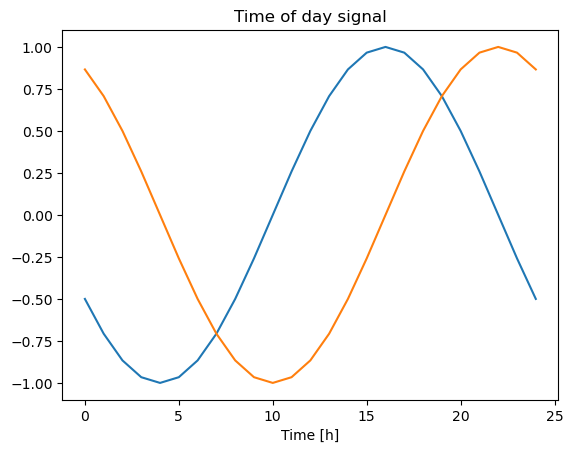

In [107]:
plt.plot(np.array(hours_sin)[:25])
plt.plot(np.array(hours_cos)[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

In [112]:
day_of_year_sin = np.sin(hourly_weather['day_of_year'] * (2 * np.pi / 365.2425))
day_of_year_cos = np.cos(hourly_weather['day_of_year'] * (2 * np.pi / 365.2425))

Text(0.5, 1.0, 'Time of day signal')

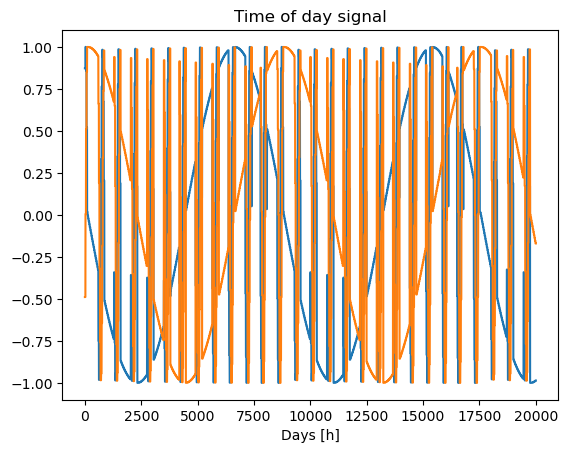

In [117]:
plt.plot(np.array(day_of_year_sin)[:20_000])
plt.plot(np.array(day_of_year_cos)[:20_000])
plt.xlabel('Days [h]')
plt.title('Time of day signal')

In [110]:
day_of_year_sin

0         0.874481
2         0.874481
4         0.874481
6         0.874481
8         0.874481
            ...   
174631    0.170830
174632    0.170830
174633    0.170830
174634    0.170830
174635    0.170830
Name: day_of_year, Length: 89660, dtype: float64